<a href="https://colab.research.google.com/github/ndeekshith/CNN_Tiny_vgg/blob/main/CNNFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
# visualization
import matplotlib.pyplot as plt


In [2]:
 # Getting the dataset
 train_data = datasets.FashionMNIST(
     root = "data"
     ,train = True
     ,download = True
     ,transform = ToTensor()
 )
 test_data = datasets.FashionMNIST(
     root = "data"
     ,train = False
     ,download = True
     ,transform = ToTensor()
 )
 train_data,test_data

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.78MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.87MB/s]


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image,label = train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [5]:
classnames = train_data.classes
classnames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
classes_to_idx = train_data.class_to_idx
classes_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image shape: {image.shape} ->[coloue_channels, height, width]")
print(f"Image label: {classnames[label]}")

Image shape: torch.Size([1, 28, 28]) ->[coloue_channels, height, width]
Image label: Ankle boot


In [9]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

torch.Size([1, 28, 28])
9


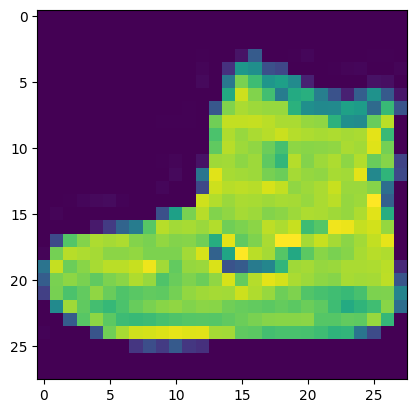

In [10]:
image, label = train_data[0]
print(image.shape)
print(label)
plt.imshow(image.squeeze())

Text(0.5, 1.0, 'Ankle boot')

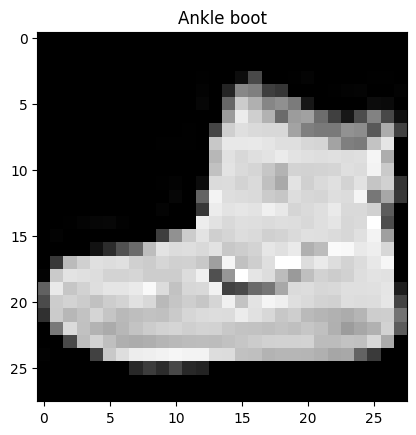

In [11]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(classnames[label])

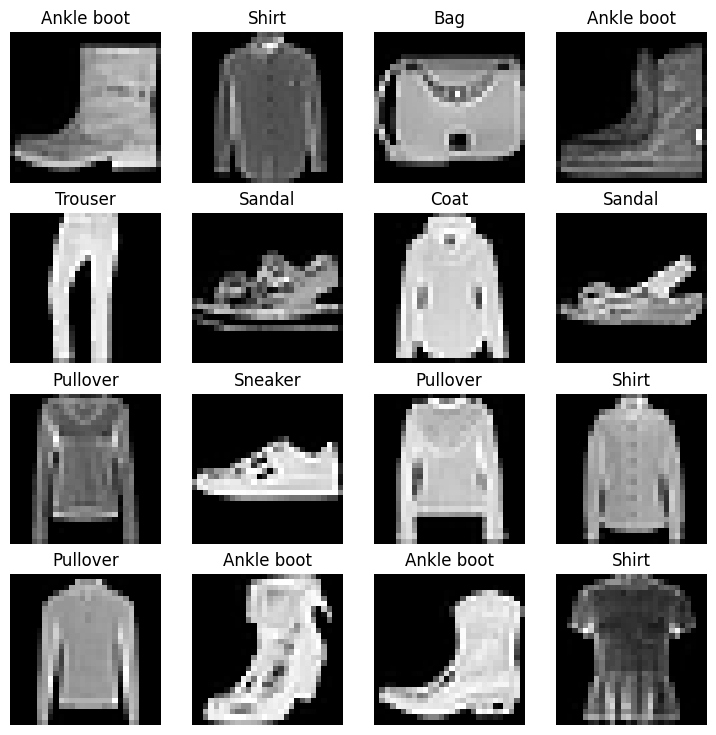

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),(1,)).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(classnames[label])
  plt.axis(False)

In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f13323dadd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f133166f650>)

In [14]:
print(f"Dataloader: {train_dataloader}\nLength: {len(train_dataloader)}\nType: {type(train_dataloader)}")
print(f"Dataloader: {test_dataloader}\nLength: {len(test_dataloader)}\nType: {type(test_dataloader)}")

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f13323dadd0>
Length: 1875
Type: <class 'torch.utils.data.dataloader.DataLoader'>
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f133166f650>
Length: 313
Type: <class 'torch.utils.data.dataloader.DataLoader'>


In [15]:
# Creating the cnn
class FashionMNIST(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int,output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1,
        ),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
        ),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1,
            ),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
                nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1,
                ),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )

    self.conv_block_3 = nn.Sequential(
            nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1,
            ),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1,
            ),
              nn.BatchNorm2d(hidden_units),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2,stride=2)
            )



    self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*3*3,
                out_features=output_shape
            ),
            nn.Softmax(dim=1)
        )
  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.conv_block_3(x)
    x = self.classifier(x)
    return x


In [16]:
torch_manual_seed = 42
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
torch.manual_seed(42)
model = FashionMNIST(input_shape=1,hidden_units=50,output_shape=len(classnames)).to(device)

In [18]:
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)

In [41]:
# Modified train_step to return metrics
def train_step_with_metrics(model, dataloader, loss_fn, optimizer, device):
    """Trains a PyTorch model for a single epoch and returns metrics."""
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

    return train_loss, train_acc

# Modified test_step to return metrics
def test_step_with_metrics(model, dataloader, loss_fn, device):
    """Tests a PyTorch model for a single epoch and returns metrics."""
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate accuracy metric
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss, test_acc



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch :0
--------
Train loss: 1.51429 | Train accuracy: 0.95%
Test loss: 1.53648 | Test accuracy: 0.93%

Epoch :1
--------
Train loss: 1.51267 | Train accuracy: 0.95%
Test loss: 1.53705 | Test accuracy: 0.92%

Epoch :2
--------
Train loss: 1.50985 | Train accuracy: 0.95%
Test loss: 1.53619 | Test accuracy: 0.92%

Epoch :3
--------
Train loss: 1.50828 | Train accuracy: 0.95%
Test loss: 1.54053 | Test accuracy: 0.92%

Epoch :4
--------
Train loss: 1.50745 | Train accuracy: 0.95%
Test loss: 1.53373 | Test accuracy: 0.93%

Total training time: 105.91282029500007


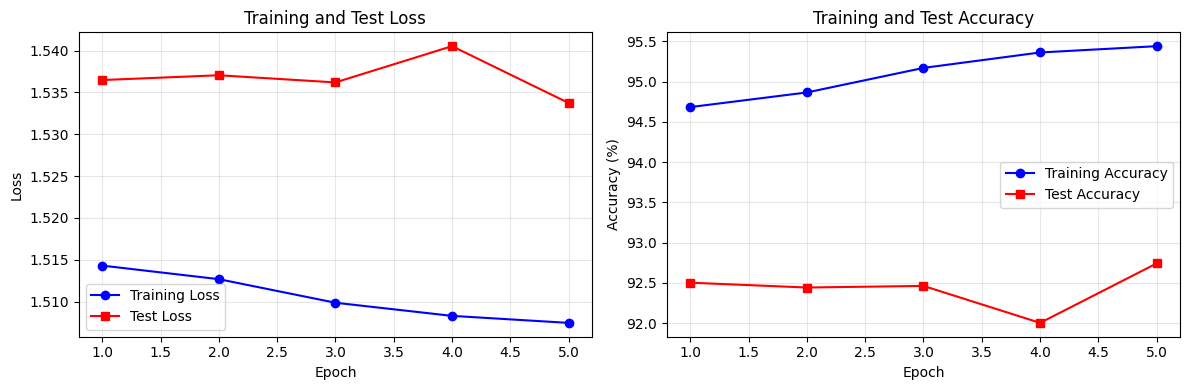


Final Results:
Training Loss: 1.5074
Training Accuracy: 95.44%
Test Loss: 1.5337
Test Accuracy: 92.74%


In [42]:
import tqdm.auto
from tqdm.auto import tqdm
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

epochs = 5

# Track training metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in tqdm(range(epochs)):
    print(f"Epoch :{epoch}\n--------")

    # Get metrics from training and testing
    train_loss, train_acc = train_step_with_metrics(model=model,
                                                   dataloader=train_dataloader,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   device=device)

    test_loss, test_acc = test_step_with_metrics(model=model,
                                               dataloader=test_dataloader,
                                               loss_fn=loss_fn,
                                               device=device)

    # Store metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

train_time_end_model = timer()
total_train_time_model = train_time_end_model - train_time_start_on_cpu
print(f"Total training time: {total_train_time_model}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), test_losses, 'r-', label='Test Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), [acc*100 for acc in train_accuracies], 'b-', label='Training Accuracy', marker='o')
plt.plot(range(1, epochs+1), [acc*100 for acc in test_accuracies], 'r-', label='Test Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"\nFinal Results:")
print(f"Training Loss: {train_losses[-1]:.4f}")
print(f"Training Accuracy: {train_accuracies[-1]*100:.2f}%")
print(f"Test Loss: {test_losses[-1]:.4f}")
print(f"Test Accuracy: {test_accuracies[-1]*100:.2f}%")

In [43]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    """Evaluates a trained pytorch model"""
    loss, acc = 0, 0
    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # Forward pass
            y_pred = model(X)

            # Calculate loss
            loss += loss_fn(y_pred, y)

            # Calculate accuracy
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # Adjust metrics to get average loss and accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model is a class type
            "model_loss": loss.item(),
            "model_acc": acc}

In [44]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [45]:
model_results = eval_model(
    model = model,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_results

{'model_name': 'FashionMNIST',
 'model_loss': 1.5337324142456055,
 'model_acc': 92.74161341853035}

In [46]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device):
    """Make predictions on a list of samples"""
    pred_probs = []
    model.eval()
    with torch.no_grad():
        for sample in data:
            # Add batch dimension
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass
            pred_logit = model(sample)

            # Convert to prediction probabilities
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Add to list
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

# Get some test samples for predictions
import random
torch.manual_seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# Make predictions
pred_probs = make_predictions(model=model,
                             data=test_samples,
                             device=device)

# Convert to predicted labels
pred_classes = pred_probs.argmax(dim=1)

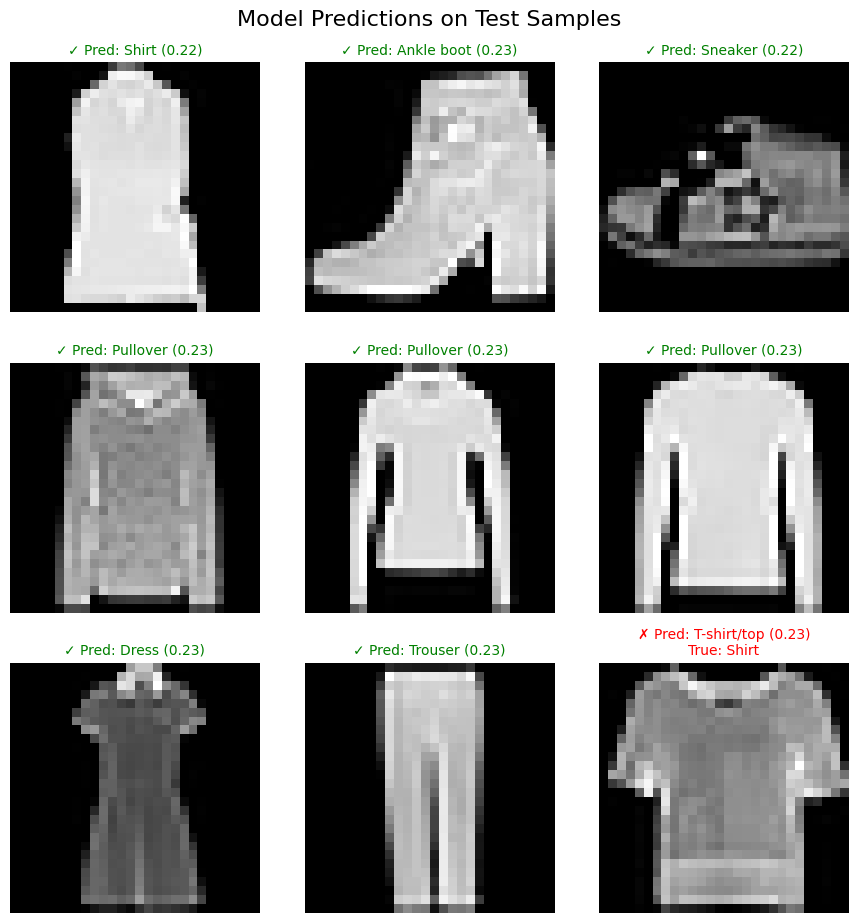

In [47]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the sample
    plt.imshow(sample.squeeze(), cmap="gray")

    # Get prediction info
    pred_class = pred_classes[i]
    pred_prob = pred_probs[i].max()
    true_class = test_labels[i]

    # Create title
    if pred_class == true_class:
        title_color = "green"
        title = f"✓ Pred: {classnames[pred_class]} ({pred_prob:.2f})"
    else:
        title_color = "red"
        title = f"✗ Pred: {classnames[pred_class]} ({pred_prob:.2f})\nTrue: {classnames[true_class]}"

    plt.title(title, color=title_color, fontsize=10)
    plt.axis(False)

plt.tight_layout()
plt.suptitle("Model Predictions on Test Samples", fontsize=16, y=1.02)
plt.show()



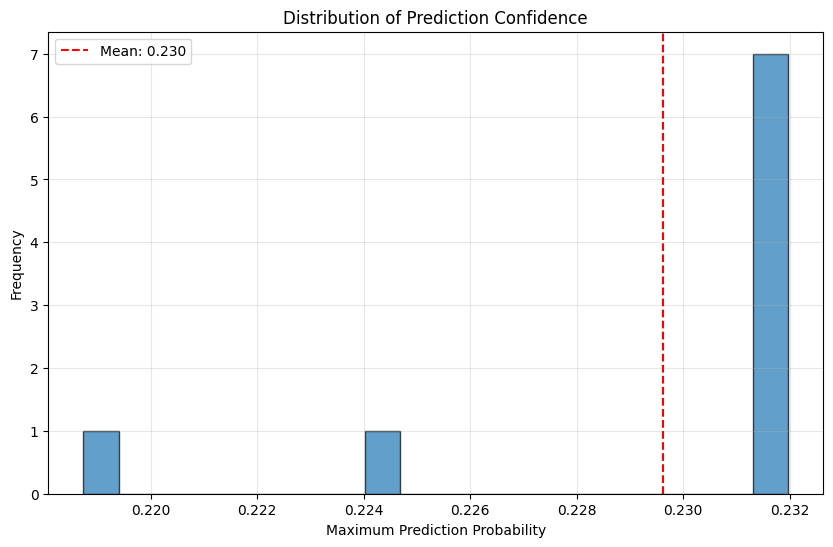

In [48]:
import sklearn
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 6))
max_probs = pred_probs.max(dim=1).values
plt.hist(max_probs, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Maximum Prediction Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Confidence')
plt.axvline(max_probs.mean(), color='red', linestyle='--', label=f'Mean: {max_probs.mean():.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

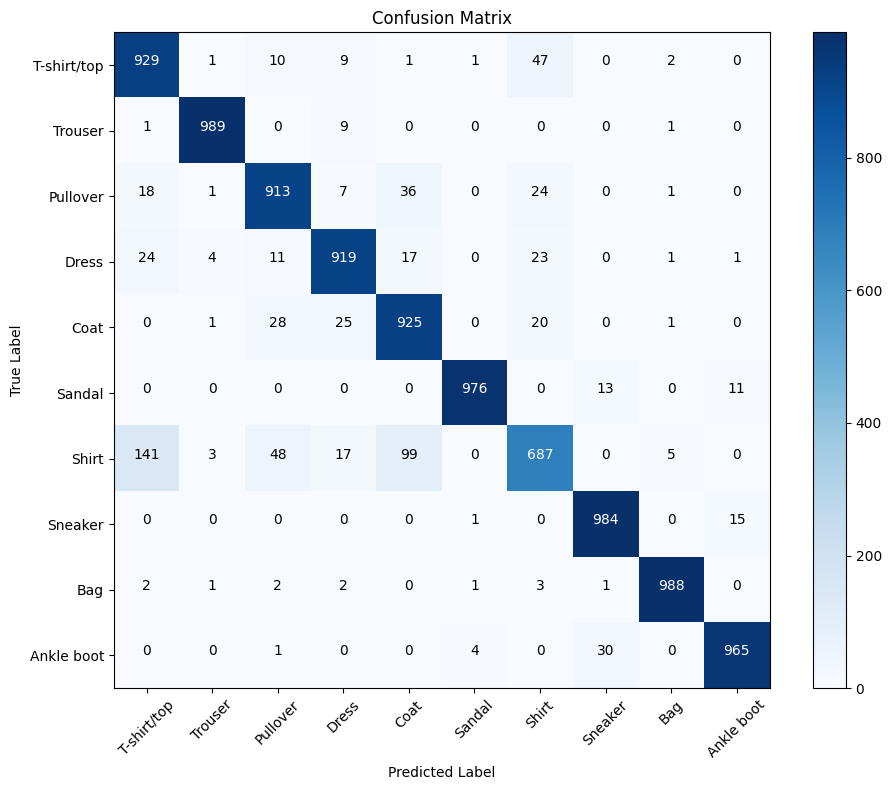

In [49]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions for entire test dataset
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        outputs = model(images)
        predicted = outputs.argmax(dim=1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=45)
plt.yticks(tick_marks, classnames)

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

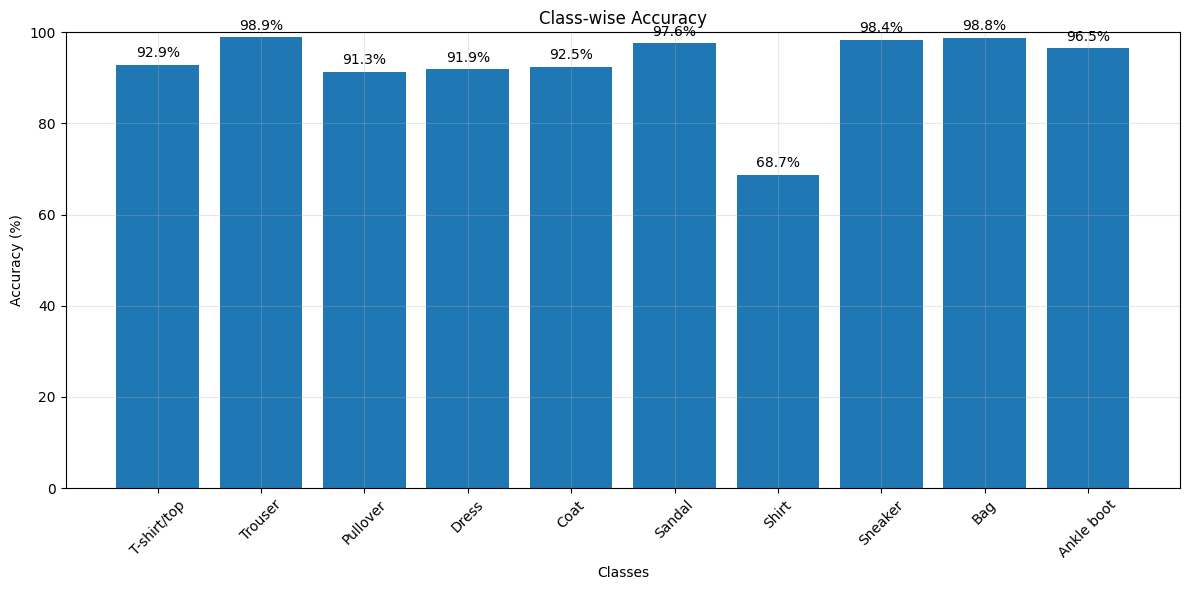

In [50]:
class_accuracy = []
for i in range(len(classnames)):
    class_mask = np.array(all_labels) == i
    if np.sum(class_mask) > 0:
        class_acc = np.mean(np.array(all_preds)[class_mask] == np.array(all_labels)[class_mask])
        class_accuracy.append(class_acc * 100)
    else:
        class_accuracy.append(0)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(classnames)), class_accuracy)
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy')
plt.xticks(range(len(classnames)), classnames, rotation=45)
plt.ylim(0, 100)

# Add value labels on bars
for bar, acc in zip(bars, class_accuracy):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{acc:.1f}%', ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 5: Top-3 predictions for a sample
sample_idx = 0
sample_image = test_samples[sample_idx]
sample_probs = pred_probs[sample_idx]
true_label = test_labels[sample_idx]


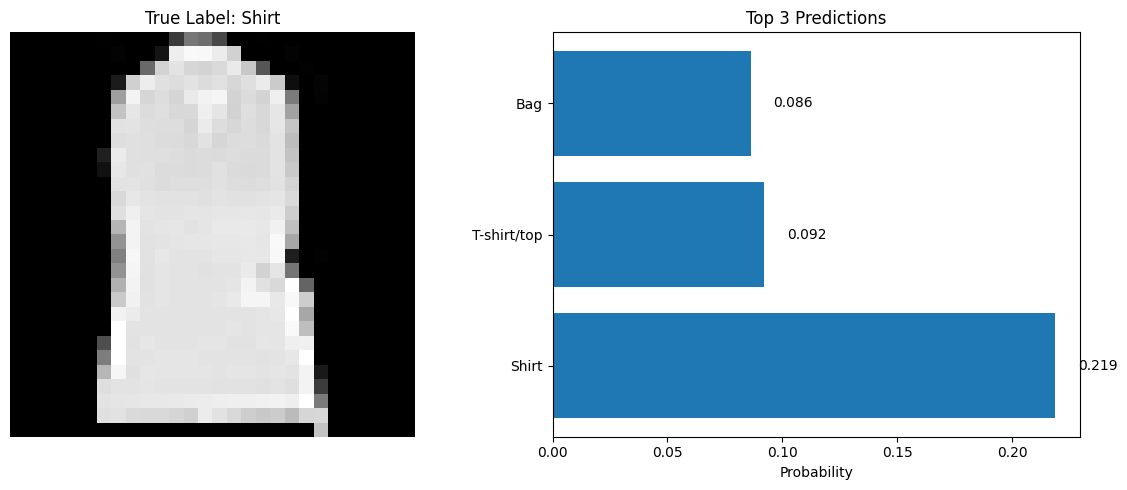

In [51]:

sample_idx = 0
sample_image = test_samples[sample_idx]
sample_probs = pred_probs[sample_idx]
true_label = test_labels[sample_idx]

# Get top 3 predictions
top3_probs, top3_indices = torch.topk(sample_probs, k=3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Show the image
ax1.imshow(sample_image.squeeze(), cmap='gray')
ax1.set_title(f'True Label: {classnames[true_label]}')
ax1.axis('off')

# Show top 3 predictions
y_pos = range(3)
ax2.barh(y_pos, top3_probs.numpy())
ax2.set_yticks(y_pos)
ax2.set_yticklabels([classnames[idx] for idx in top3_indices])
ax2.set_xlabel('Probability')
ax2.set_title('Top 3 Predictions')

# Add probability values on bars
for i, prob in enumerate(top3_probs):
    ax2.text(prob + 0.01, i, f'{prob:.3f}', va='center')

plt.tight_layout()
plt.show()

In [52]:
def predict_single_image(model, image, device, class_names):
    """Predict class for a single image"""
    model.eval()
    with torch.no_grad():
        # Add batch dimension if needed
        if image.dim() == 3:
            image = image.unsqueeze(0)

        image = image.to(device)

        # Forward pass
        pred_logits = model(image)
        pred_probs = torch.softmax(pred_logits, dim=1)

        # Get prediction
        pred_class = pred_probs.argmax(dim=1).item()
        pred_confidence = pred_probs.max().item()

        return {
            'predicted_class': class_names[pred_class],
            'predicted_index': pred_class,
            'confidence': pred_confidence,
            'all_probabilities': pred_probs.squeeze().cpu().numpy()
        }

# Example usage of single image prediction
print("\nExample single image prediction:")
sample_image, sample_label = test_data[100]
prediction = predict_single_image(model, sample_image, device, classnames)
print(f"True label: {classnames[sample_label]}")
print(f"Predicted: {prediction['predicted_class']}")
print(f"Confidence: {prediction['confidence']:.3f}")
print(f"Correct: {'✓' if prediction['predicted_index'] == sample_label else '✗'}")



Example single image prediction:
True label: Dress
Predicted: Dress
Confidence: 0.232
Correct: ✓
